In [75]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [76]:
train = pd.read_csv('train.csv')

# Exploratory Data Analysis

In [77]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [78]:
y_train= train.iloc[:, 4].values 

In [79]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

<AxesSubplot:xlabel='target', ylabel='count'>

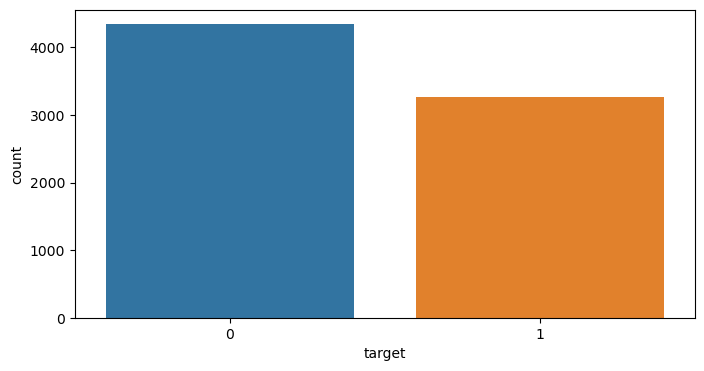

In [80]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train, x='target', ax=ax)

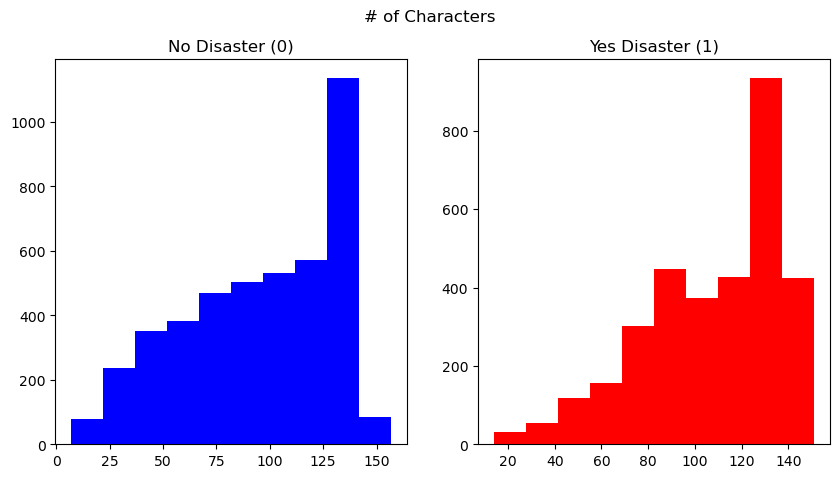

In [81]:
# Viewing the distribution of the number of characters in Tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
characters = train[train['target']==0]['text'].str.len()
ax1.hist(characters,color='blue')
ax1.set_title('No Disaster (0)')
characters = train[train['target']==1]['text'].str.len()
ax2.hist(characters,color='red')
ax2.set_title('Yes Disaster (1)')
fig.suptitle('# of Characters')
plt.show()

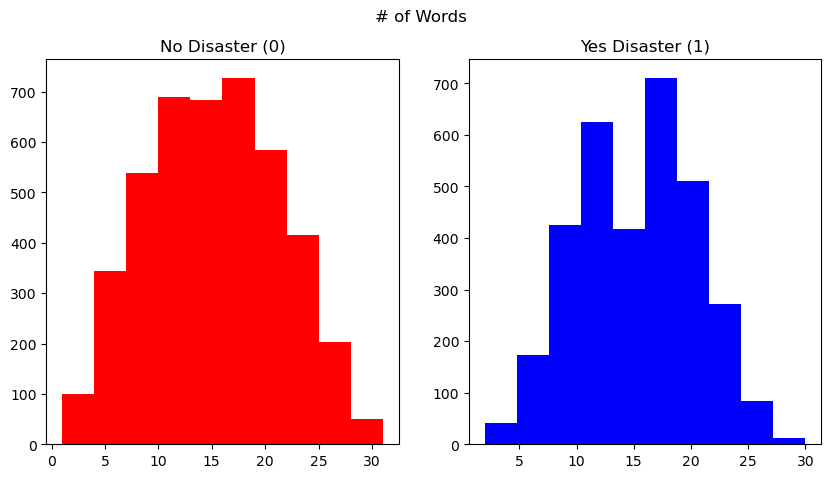

In [82]:
# Viewing the distribution of the number of words in Tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
words = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(words,color='red')
ax1.set_title('No Disaster (0)')
words = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(words,color='blue')
ax2.set_title('Yes Disaster (1)')
fig.suptitle('# of Words')
plt.show()

# Cleaning the Data

In [83]:
test = pd.read_csv('test.csv')

In [84]:
# Concatenating train and test datasets
data = pd.concat([train,test])


In [85]:
data.shape

(10876, 5)

# The data cleaning steps above have accomplished the following:

Removed URLs

Removed HTML tags

Removed emojis

Removed punctuation

By applying the cleaning functions above, our dataset is now more streamline and thus should fit the future model better. Above, we can see a quick look at the newly cleaned data. There are now no miscellaneous characters in the text.

In [86]:
import re
import string

def clean(text):

# Creating function to remove URLs

    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',text)

# Creating function to remove HTML tags

    html = re.compile(r'<.*?>')
    text = html.sub(r'',text)

# Creating function to remove emojis, adapted from: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text =  emoji_pattern.sub(r'', text)


# Creating function to remove punctuation

    punct = str.maketrans('','',string.punctuation)
    text =  text.translate(punct)
    
    return text

In [87]:
data['text'] = data['text'].apply(lambda x: clean(x))


In [88]:
# Checking fully cleaned text
data['text'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object

# The data pre-processing steps above have accomplished the following:

Removed non characters

changed to lower

Removed stop words

By applying the preprocessing functions above, our dataset is now more streamline and thus should fit the future model better. Above, we can see a quick look at the newly pre-processed data. 

In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



def preprocess(text):
   
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    return review
    
    

In [90]:
data['text'] = data['text'].apply(lambda x: preprocess(x))

In [91]:
# Checking fully preprocessed text
data['text'].head()

0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: text, dtype: object

In [92]:
 #Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['text']).toarray()

In [93]:
train = X[0:7613,]
test = X[7613:10876,]

In [94]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size = 0.3, random_state = 42)

# Multinomial NB

In [95]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB(alpha=0.1)
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[1141  177]
 [ 277  689]]


Accuracy is  80.12 %
Precision is  0.8
Recall is  0.71


In [96]:
# Predicting the Test set results
y_pred = classifier1.predict(test)

In [97]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# Submission

In [98]:
# Loading in sample submission
sample_submission =pd.read_csv('sample_submission.csv')

In [100]:
y_pred=np.round(y_pred).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':y_pred})
sub.to_csv('submission.csv',index=False)